# TF-IDF & Árvores de Decisão

## Introdução
Este notebook demonstra um exemplo de construção de um modelo de aprendizado supervisionado utilizando TF-IDF e uma árvore de decisão para classificar problemas mecânicos de carros.

### O que é TF-IDF?
TF-IDF (Term Frequency-Inverse Document Frequency) é uma técnica amplamente usada em processamento de linguagem natural para converter textos em uma representação numérica que possa ser usada por algoritmos de aprendizado de máquina. 

Essa técnica mede a importância de uma palavra em um documento específico em relação a um conjunto de documentos, ajudando a identificar palavras relevantes para a análise.

- **Term Frequency (TF)**: A frequência de um termo representa quantas vezes uma palavra aparece em um documento específico. Se uma palavra aparece muitas vezes em um documento, seu valor TF será maior. No entanto, palavras muito comuns como "e", "de", "o" costumam aparecer em quase todos os documentos, então é necessário equilibrar esse valor para garantir que apenas palavras significativas sejam destacadas.
- **Inverse Document Frequency (IDF)**: A frequência inversa do documento mede a raridade de uma palavra em todo o corpus (conjunto de documentos). Quanto mais rara for a palavra, maior será seu valor IDF. Se uma palavra aparece em muitos documentos, seu IDF será baixo, pois ela não é útil para diferenciar os documentos entre si.

O TF-IDF é, portanto, o produto do TF pelo IDF. Seu objetivo é destacar palavras que são importantes em um documento específico, mas que não são muito comuns em todos os documentos do corpus. Isso permite que os algoritmos de aprendizado de máquina foquem nas palavras mais relevantes, ignorando aquelas que não ajudam a diferenciar os textos.

### Cálculo Matemático do TF-IDF
O TF-IDF é uma métrica que combina duas medidas: **TF (Term Frequency)** e **IDF (Inverse Document Frequency)**.

#### 1. Term Frequency (TF)
A frequência de um termo é calculada da seguinte forma:

$$
TF(t, d) = \frac{f_{t,d}}{N_d}
$$

Onde:
- (f_{t,d}) é o número de vezes que o termo ( t ) aparece no documento ( d ).
- (N_d) é o número total de termos no documento ( d ).

#### 2. Inverse Document Frequency (IDF)
A frequência inversa do documento é dada por:

$$
IDF(t, D) = \log \left( \frac{N}{n_t} \right)
$$

Onde:
- ( N ) é o número total de documentos no corpus.
- ( n_t ) é o número de documentos que contém o termo ( t ).

#### 3. TF-IDF
O TF-IDF é calculado como o produto do TF pelo IDF:

$$
TFIDF(t, d, D) = TF(t, d) \times IDF(t, D)
$$

Em resumo, o **TF** ajuda a medir a frequência do termo dentro do documento, enquanto o **IDF** reduz a importância de termos comuns no corpus, destacando termos que são mais raros e, portanto, mais significativos para distinguir documentos.

### Exemplo Simples de Cálculo do TF-IDF
Vamos ver um exemplo simples para entender como calcular o TF-IDF.

Suponha que temos um corpus com três documentos:

- **Documento 1**: "o carro está quebrado"
- **Documento 2**: "o carro está funcionando"
- **Documento 3**: "o motor do carro está quebrado"

Queremos calcular o TF-IDF da palavra "carro" em cada documento.

1. **Cálculo do TF (Term Frequency)**
   - **Documento 1**: A palavra "carro" aparece 1 vez em um total de 4 palavras. Portanto:
     
     $$
     TF = \frac{1}{4} = 0,25
     $$
   - **Documento 2**: A palavra "carro" aparece 1 vez em um total de 4 palavras. Portanto:
     
     $$
     TF = \frac{1}{4} = 0,25
     $$
   - **Documento 3**: A palavra "carro" aparece 1 vez em um total de 5 palavras. Portanto:
     
     $$
     TF = \frac{1}{5} = 0,20
     $$

2. **Cálculo do IDF (Inverse Document Frequency)**
   - A palavra "carro" aparece em todos os três documentos, então:
     
     $$
     n_t = 3
     $$
   - Como temos 3 documentos no total $$( N = 3 )$$, o IDF é calculado como:
     
     $$
     IDF = \log \left( \frac{3}{3} \right) = \log(1) = 0
     $$

3. **Cálculo do TF-IDF**
   - Como o IDF da palavra "carro" é 0, o valor TF-IDF para "carro" em todos os documentos será:
     
     $$
     TFIDF = TF \times IDF = 0
     $$
   - Isso significa que, como "carro" é uma palavra comum em todos os documentos, ela não possui importância para diferenciar os documentos no nosso corpus.

Esse exemplo mostra como o TF-IDF consegue reduzir a importância de palavras comuns e destacar termos que são mais úteis para diferenciar os documentos. Ele é especialmente eficaz para termos que aparecem em alguns documentos, mas não em outros, ajudando a identificar quais palavras são realmente significativas para a análise do conteúdo.

Queremos calcular o TF-IDF da palavra "quebrado" em cada documento.

1. **Cálculo do TF (Term Frequency)**
   - **Documento 1**: A palavra "quebrado" aparece 1 vez em um total de 4 palavras. Portanto:
     
     $$
     TF = \frac{1}{4} = 0,25
     $$
   - **Documento 2**: A palavra "quebrado" não aparece. Portanto:
     
     $$
     TF = 0
     $$
   - **Documento 3**: A palavra "quebrado" aparece 1 vez em um total de 5 palavras. Portanto:
     
     $$
     TF = \frac{1}{5} = 0,20
     $$

2. **Cálculo do IDF (Inverse Document Frequency)**
   - A palavra "quebrado" aparece em dois dos três documentos, então:
     
     $$
     n_t = 2
     $$
   - Como temos 3 documentos no total (\( N = 3 \)), o IDF é calculado como:
     
     $$
     IDF = \log \left( \frac{3}{2} \right) \approx 0,176
     $$

3. **Cálculo do TF-IDF**
   - **Documento 1**:
     
     $$
     TFIDF = TF \times IDF = 0,25 \times 0,176 = 0,044
     $$
   - **Documento 2**:
     
     $$
     TFIDF = TF \times IDF = 0 \times 0,176 = 0
     $$
   - **Documento 3**:
     
     $$
     TFIDF = TF \times IDF = 0,20 \times 0,176 = 0,035
     $$

Neste exemplo, vemos que a palavra "quebrado" tem um valor TF-IDF maior nos Documentos 1 e 3, indicando que é uma palavra importante nesses documentos, mas não aparece no Documento 2. Isso significa que "quebrado" ajuda a diferenciar os Documentos 1 e 3, enquanto não tem importância no Documento 2.

---

Outros Modelos Simples para Representação de Texto

Além do TF-IDF, existem outros métodos amplamente utilizados para converter texto em representações numéricas, permitindo que modelos de aprendizado de máquina possam processá-lo de forma eficiente. Vamos explorar três deles:
1. Bag of Words (BoW)

O modelo Bag of Words é uma técnica simples e intuitiva para representar textos. Nele, o texto é tratado como um "saco" de palavras, onde apenas a frequência de cada palavra é contabilizada, sem levar em consideração a ordem em que elas aparecem. Cada documento é representado por um vetor de frequências, onde a posição de cada palavra corresponde a sua frequência no documento.

Quando Usar: O BoW é eficaz quando a ordem das palavras não é importante para o contexto do problema. Ele é útil para tarefas simples de classificação de texto, como detecção de spam ou análise de sentimentos, onde a presença de certas palavras já é suficiente para gerar insights.

2. Word2Vec

Word2Vec é uma técnica de representação de palavras que visa capturar os significados semânticos e sintáticos delas. Em vez de representar cada palavra por um número (como no BoW ou TF-IDF), o Word2Vec representa palavras como vetores contínuos em um espaço de alta dimensionalidade, de forma que palavras com significados semelhantes fiquem próximas entre si nesse espaço.

Quando Usar: O Word2Vec é útil quando a semântica das palavras é importante para a tarefa, como em análises de sentimentos complexas, tradução automática ou quando o contexto das palavras precisa ser levado em consideração. Ele é eficaz em grandes corpora de texto, pois aprende representações de palavras que capturam suas relações semânticas.

3. Count Vectorizer

O Count Vectorizer é muito semelhante ao BoW, mas ao invés de criar um vetor de frequências para cada palavra individualmente, ele também pode ser configurado para considerar grupos de palavras consecutivas (n-grams), o que melhora a representação ao capturar um pouco da estrutura da linguagem. No modelo n-gram, um documento pode ser representado como uma sequência de uni, bi ou trigramas (grupos de uma, duas ou três palavras consecutivas).

Quando Usar: O Count Vectorizer é uma ótima escolha quando a ordem das palavras ou combinações específicas de palavras (como "freio quebrado") são importantes para a tarefa de classificação. Ele é especialmente útil em problemas onde você deseja capturar padrões de palavras ao longo de frases.

### O que é uma Árvore de Decisão?
Uma árvore de decisão é um modelo de aprendizado supervisionado que se assemelha a uma estrutura de árvore, onde cada nó representa uma pergunta ou teste em relação a um atributo dos dados, e cada ramo representa o resultado desse teste.

- **Nó Raiz**: É o ponto de partida da árvore, onde a primeira decisão é feita.
- **Nós Internos**: Cada nó interno representa uma pergunta ou decisão baseada em um atributo. Por exemplo, em um problema de classificação de carros, uma decisão poderia ser "O carro está fazendo barulho?".
- **Ramos**: Cada ramo representa um possível resultado da pergunta feita no nó. Continuamos percorrendo a árvore até encontrar um resultado final.
- **Nós Folhas**: São os nós finais que representam a decisão ou classificação do modelo.

A árvore de decisão funciona como um conjunto de perguntas sequenciais que nos guiam para uma resposta final. Ela é fácil de interpretar e visualizar, sendo muito útil para entender como o modelo chegou a uma determinada conclusão. Árvores de decisão são usadas tanto para tarefas de **classificação** (ex.: classificar um problema mecânico do carro) quanto de **regressão** (ex.: prever o valor de um carro).

![Árvore de Decisão](https://didatica.tech/wp-content/uploads/2020/07/image-3.png)


---



### Sobre o Dataset
O dataset fornecido contém descrições de problemas mecânicos que um carro pode apresentar. Inclui características sobre o problema e a classe correspondente de diagnóstico, que é a variável alvo. O objetivo é treinar um modelo para prever o tipo de problema mecânico com base nas características fornecidas.

---

In [1]:
## Passo 1: Carregar e Visualizar o Dataset

# Importar bibliotecas necessárias
import pandas as pd

# Carregar o dataset fornecido
file_path = 'dataset.csv'
dataset = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset
dataset.head()

,Qual é o problema que você está enfrentando com o carro?,Há quanto tempo o problema começou?,O problema ocorre de forma intermitente ou contínua?,Você notou algum ruído incomum?,Houve perda de potência do motor?,Qual foi a última vez que o carro passou por uma manutenção?,Você percebeu cheiro de combustível dentro do veículo?,O veículo apresenta dificuldades para dar partida?,Alguma luz de alerta no painel está acesa?,Você observou algum vazamento de fluido no chão?,target,Você notou algum ruído incomum? Houve perda de potência do motor?
0,O carro não está ligando.,Ontem à noite.,Contínua.,"Sim, há um clique.",Não sei.,Há 3 meses.,Não.,Sim.,"Sim, luz do motor.","Sim, óleo.",Problema Elétrico.,NaN
1,Os faróis estão piscando sozinhos.,Desde o início da semana.,Intermitente.,Não.,Não.,Foi feita manutenção nos faróis recentemente.,Não.,"Sim, ocasionalmente.","Sim, luz de bateria.","Sim, líquido de arrefecimento.",Problema Elétrico.,NaN
2,O carro não está ligando.,Ontem à noite.,Contínua.,"Sim, há um clique.",Não sei.,Há 3 meses.,Não.,Sim.,"Sim, luz do motor.","Sim, óleo.",Problema Elétrico.,NaN
3,O carro não está ligando.,Ontem à noite.,Contínua.,"Sim, há um clique.",Não sei.,Há 3 meses.,Não.,Sim.,"Sim, luz do motor.","Sim, óleo.",Problema Elétrico.,NaN
4,Os faróis estão piscando sozinhos.,Desde o início da semana.,Intermitente.,Não.,Não.,Foi feita manutenção nos faróis recentemente.,Não.,"Sim, ocasionalmente.","Sim, luz de bateria.","Sim, líquido de arrefecimento.",Problema Elétrico.,NaN


### Análise Inicial
Vamos realizar uma análise exploratória inicial para entender melhor os dados com os quais estamos trabalhando.

In [2]:
# Análise exploratória dos dados
print("Resumo das colunas:")
print(dataset.info())

print("\nVerificar valores nulos:")
print(dataset.isnull().sum())

print("\nDistribuição das classes target:")
print(dataset['target'].value_counts())

Resumo das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Qual é o problema que você está enfrentando com o carro?           151 non-null    object
 1   Há quanto tempo o problema começou?                                151 non-null    object
 2   O problema ocorre de forma intermitente ou contínua?               151 non-null    object
 3   Você notou algum ruído incomum?                                    151 non-null    object
 4   Houve perda de potência do motor?                                  151 non-null    object
 5   Qual foi a última vez que o carro passou por uma manutenção?       151 non-null    object
 6   Você percebeu cheiro de combustível dentro do veículo?             151 non-null    object
 7   O veículo apres

# Passo 2: Pré-processamento dos Dados
Nesta etapa, vamos unificar todas as colunas de entrada em uma única coluna de texto e converter o texto em uma representação numérica utilizando TF-IDF.

In [3]:
# Remover a coluna que contém dados faltantes
dataset.dropna(axis=1, inplace=True)

# Concatenar todas as colunas de texto para criar uma representação unificada do problema
dataset['texto_unificado'] = dataset.drop(columns=['target']).apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Separar variáveis independentes (X) e dependentes (y)
X = dataset['texto_unificado']
y = dataset['target']

# Passo 3: Vetorização com TF-IDF
Utilizaremos o TF-IDF para transformar o texto em uma representação numérica que pode ser usada para treinar o modelo. Além disso, vamos testar diferentes métodos de vetorização para avaliar o desempenho do modelo.

In [4]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords

print(stopwords.words('portuguese'))

# Converter os textos em representações TF-IDF
vectorizer_tfidf = TfidfVectorizer(stop_words=stopwords.words('portuguese'), max_features=1000)
X_tfidf = vectorizer_tfidf.fit_transform(X)
print(X_tfidf)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [6]:
# Converter os textos em representações TF-IDF
vectorizer_tfidf = TfidfVectorizer(stop_words=stopwords.words('portuguese'), max_features=10)
X_tfidf = vectorizer_tfidf.fit_transform(X)

# Exibir as palavras mais importantes e suas respectivas pontuações TF-IDF
print("Palavras mais importantes (features) e seus respectivos pesos TF-IDF:")
features_names = vectorizer_tfidf.get_feature_names_out()

# Convertendo a matriz esparsa em um DataFrame para melhor visualização
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=features_names)
print(df_tfidf.head())


Palavras mais importantes (features) e seus respectivos pesos TF-IDF:
      carro  contínua  dirigir  intermitente     meses   semana       sim  \
0  0.343482  0.332239      0.0      0.000000  0.343482  0.00000  0.730522   
1  0.000000  0.000000      0.0      0.418884  0.000000  0.42836  0.800653   
2  0.343482  0.332239      0.0      0.000000  0.343482  0.00000  0.730522   
3  0.343482  0.332239      0.0      0.000000  0.343482  0.00000  0.730522   
4  0.000000  0.000000      0.0      0.418884  0.000000  0.42836  0.800653   

   sinto  trepidação      óleo  
0    0.0         0.0  0.346404  
1    0.0         0.0  0.000000  
2    0.0         0.0  0.346404  
3    0.0         0.0  0.346404  
4    0.0         0.0  0.000000  


# Passo 4: Divisão do Conjunto de Dados
Dividimos os dados em conjuntos de treino e teste para garantir que não haja vazamento de informações durante o treinamento e avaliação do modelo.

In [7]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em conjuntos de treino e teste (80% treino, 20% teste) usando TF-IDF
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=None)

# Passo 5: Treinamento do Modelo de Árvore de Decisão
Vamos treinar uma árvore de decisão com os dados de treino utilizando ambas as representações (TF-IDF e CountVectorizer).

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Treinar o modelo de Árvore de Decisão com TF-IDF
modelo_tfidf = DecisionTreeClassifier(random_state=42)
modelo_tfidf.fit(X_train_tfidf, y_train)


DecisionTreeClassifier(random_state=42)

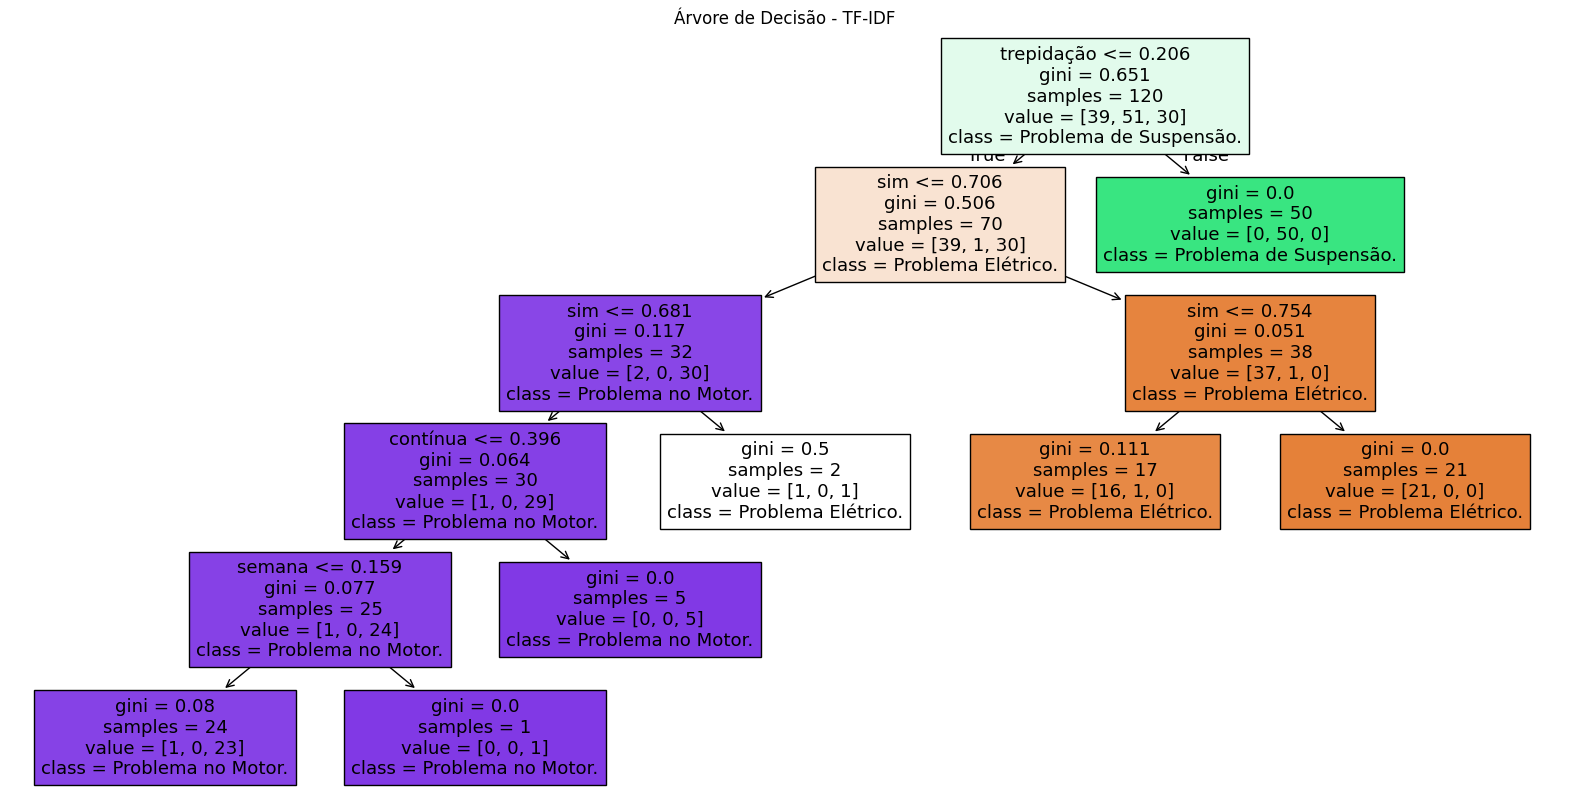

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar a árvore de decisão graficamente para o modelo treinado com TF-IDF
plt.figure(figsize=(20, 10))
plot_tree(modelo_tfidf, filled=True, feature_names=vectorizer_tfidf.get_feature_names_out(), class_names=y.unique().astype(str))
plt.title("Árvore de Decisão - TF-IDF")
plt.show()

# Passo 6: Avaliação do Modelo
Após treinar o modelo, faremos previsões no conjunto de teste e avaliaremos seu desempenho utilizando ambas as representações.

In [10]:
from sklearn.metrics import classification_report, accuracy_score

# Fazer previsões no conjunto de teste usando TF-IDF
y_pred_tfidf = modelo_tfidf.predict(X_test_tfidf)

# Avaliar o modelo com TF-IDF
print("\nRelatório de Classificação (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))

print("\nAcurácia do modelo (TF-IDF):")
print(accuracy_score(y_test, y_pred_tfidf))



Relatório de Classificação (TF-IDF):
                        precision    recall  f1-score   support

    Problema Elétrico.       1.00      0.88      0.93         8
Problema de Suspensão.       0.93      1.00      0.96        13
    Problema no Motor.       1.00      1.00      1.00        10

              accuracy                           0.97        31
             macro avg       0.98      0.96      0.97        31
          weighted avg       0.97      0.97      0.97        31


Acurácia do modelo (TF-IDF):
0.967741935483871


In [11]:
# Nova amostra de conversa simulada
nova_conversa = {
    'Qual é o problema que você está enfrentando com o carro?': 'O carro não está ligando.',
    'Há quanto tempo o problema começou?': 'Ontem à noite.',
    'O problema ocorre de forma intermitente ou contínua?': 'Contínua.',
    'Você notou algum ruído incomum? Houve perda de potência do motor?': 'Sim, há um clique. Não sei.',
    'Qual foi a última vez que o carro passou por uma manutenção?': 'Há 3 meses.',
    'Você percebeu cheiro de combustível dentro do veículo?': 'Não.',
    'O veículo apresenta dificuldades para dar partida?': 'Sim.',
    'Alguma luz de alerta no painel está acesa?': 'Sim, luz do motor.',
    'Você observou algum vazamento de fluido no chão?': 'Sim, óleo.'
}

# Converter a nova conversa em um DataFrame
nova_conversa_df = pd.DataFrame([nova_conversa])

# Concatenar as colunas da nova conversa para criar uma representação unificada
nova_conversa_df['texto_unificado'] = nova_conversa_df.apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Converter o texto da nova conversa para TF-IDF
nova_conversa_tfidf = vectorizer_tfidf.transform(nova_conversa_df['texto_unificado'])

# Fazer a previsão usando o modelo treinado
predicao_nova_conversa = modelo_tfidf.predict(nova_conversa_tfidf)

# Mostrar a previsão
print(f"Previsão para a nova conversa: {predicao_nova_conversa[0]}")


Previsão para a nova conversa: Problema Elétrico.
